# Predicting Hotel Booking Cancelation

In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('/Users/waadalotaibi/Desktop/DS/HotelData11.csv')


In [12]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          5499 non-null   int64  
 1   no_of_children                        5499 non-null   int64  
 2   no_of_weekend_nights                  5499 non-null   int64  
 3   no_of_week_nights                     5499 non-null   int64  
 4   type_of_meal_plan                     5499 non-null   object 
 5   required_car_parking_space            5499 non-null   int64  
 6   room_type_reserved                    5499 non-null   object 
 7   lead_time                             5499 non-null   int64  
 8   arrival_year                          5499 non-null   int64  
 9   arrival_month                         5499 non-null   int64  
 10  arrival_date                          5499 non-null   int64  
 11  market_segment_ty

In [14]:
df.shape

(5499, 18)

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
print(df.columns.tolist())

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,5499.0,1.887980,0.510529,0.0,2.000,2.0,2.0,4.0
no_of_children,5499.0,0.111475,0.403843,0.0,0.000,0.0,0.0,3.0
no_of_weekend_nights,5499.0,0.833424,0.871251,0.0,0.000,1.0,2.0,6.0
no_of_week_nights,5499.0,2.266594,1.451231,0.0,1.000,2.0,3.0,15.0
required_car_parking_space,5499.0,0.026914,0.161847,0.0,0.000,0.0,0.0,1.0
lead_time,5499.0,93.270413,91.085808,0.0,22.000,66.0,142.0,521.0
arrival_year,5499.0,2018.246772,0.646243,2017.0,2018.000,2018.0,2019.0,2019.0
arrival_month,5499.0,6.413712,2.982909,1.0,4.000,6.0,9.0,12.0
arrival_date,5499.0,15.488998,8.651493,1.0,8.000,16.0,23.0,31.0
repeated_guest,5499.0,0.024550,0.154763,0.0,0.000,0.0,0.0,1.0


In [18]:
#non-numeric
df.describe(include=['bool','object']).T

,count,unique,top,freq
type_of_meal_plan,5499,3,Meal Plan 1,4048
room_type_reserved,5499,7,Room_Type 1,4114
market_segment_type,5499,5,Online,4265
booking_status,5499,2,Not_Canceled,3460


In [19]:
#check the missin value
df.isna().head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# check the distribution of target column booking_status 
target_var = pd.DataFrame(df['booking_status'].value_counts()).reset_index()
target_var_percenatage = pd.DataFrame(df['booking_status'].value_counts(normalize=True)).reset_index()

target_var.columns = ['booking_status','count']
target_var_percenatage.columns = ['booking_status','percentage']
target_var['percentage'] = target_var_percenatage['percentage']
descending_order = df['booking_status'].value_counts().sort_values(ascending=False).index
print(target_var)



  booking_status  count  percentage
0   Not_Canceled   3460    0.629205
1       Canceled   2039    0.370795


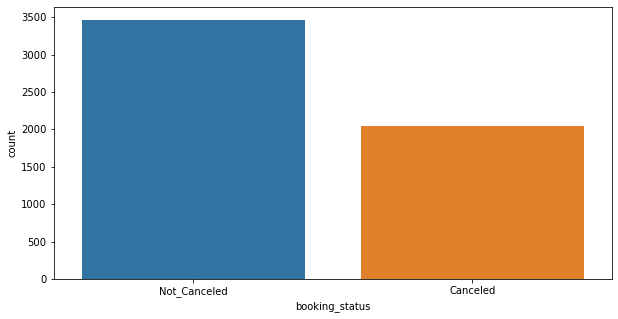

In [21]:
#visulaing the target columns distribution 
pd.DataFrame(df['booking_status'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x = 'booking_status', data=df, order = descending_order)
plt.xticks()
plt.show()

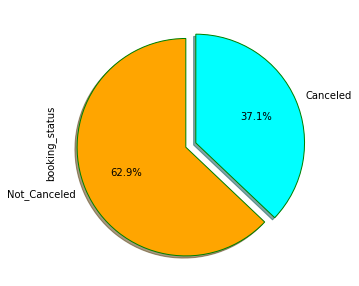

In [22]:
# checking the target columns distribution through Pie chart 
explode = (0.1, 0.0)
colors = ( "orange", "cyan")
wp = { 'linewidth' : 1, 'edgecolor' : "green" } # Wedge properties
df['booking_status'].value_counts().plot(kind="pie", figsize=(5,5),startangle=90, shadow=True,autopct="%1.1f%%",explode = explode,
                                   colors=colors,wedgeprops = wp)
plt.show()

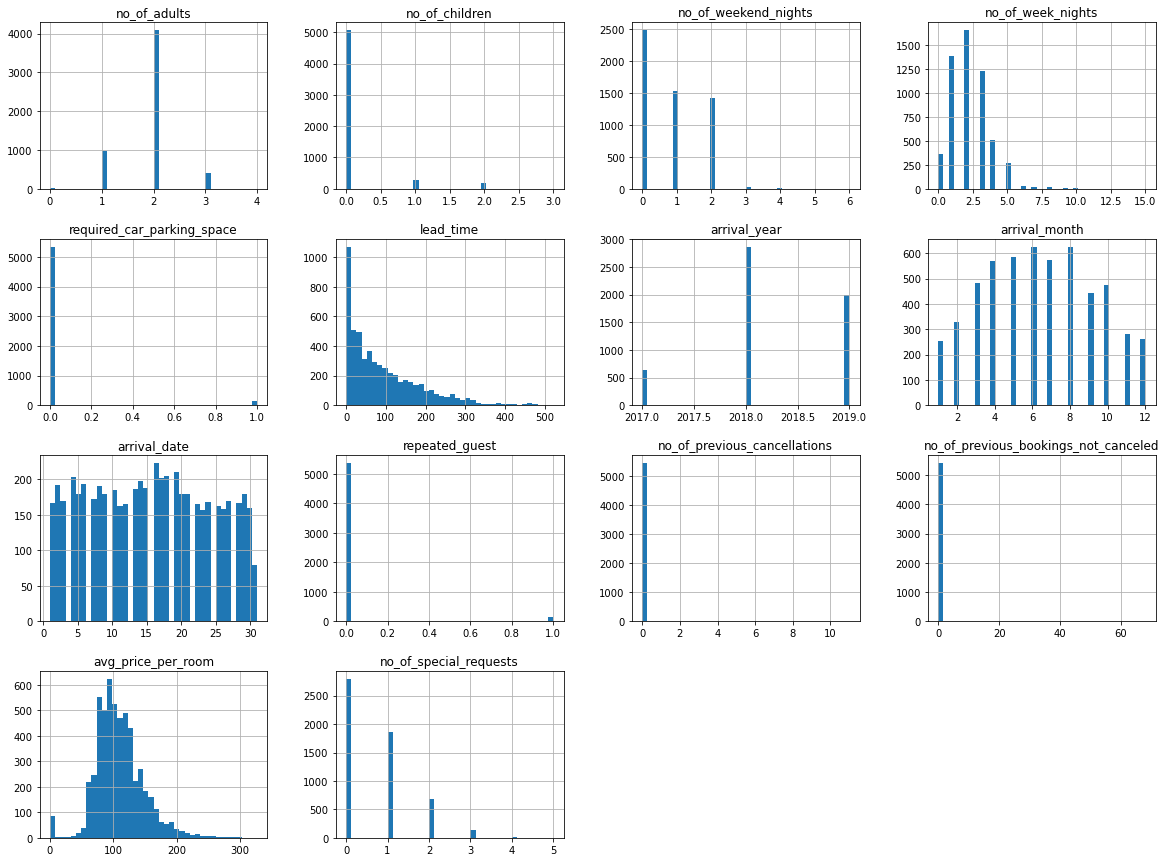

In [23]:
# Overall idea about distribution of data histogram numeric columns
df.hist(bins=40, figsize=(20,15))
plt.show()

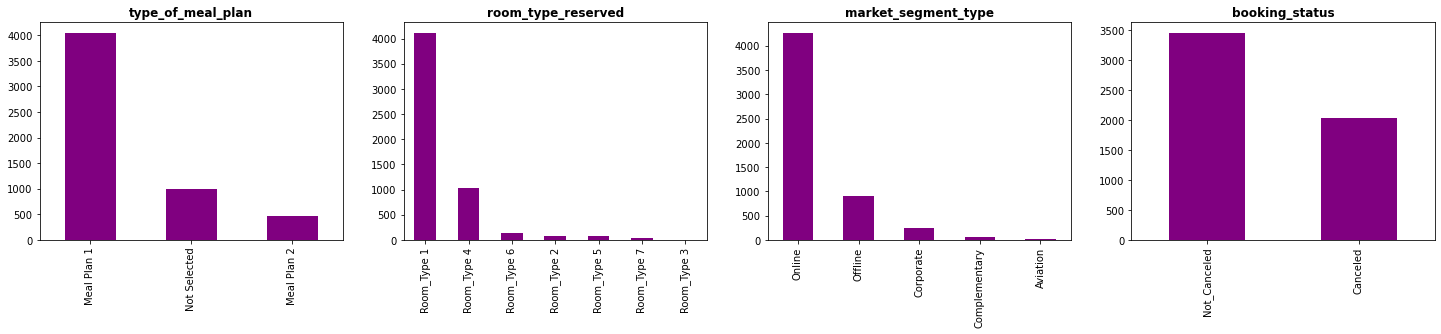

In [24]:
# Distribution of categorical variables
import matplotlib.pyplot as plt

categorical_features = df.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(1, len(categorical_features), figsize=(25, 4))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], color='purple').set_title(categorical_feature, weight='bold')

# Exploratory Data Analysis (EDA)
1.What are the busiest months in the hotel? ...


In [25]:
# lets try to get the dataframe where booking status is not canceled
dff = df[df['booking_status']=='Not_Canceled']

busiest_month_df = dff.groupby('arrival_month')['booking_status'].size().reset_index()
busiest_month_df.set_index('arrival_month', inplace=True)
busiest_month_df = busiest_month_df['booking_status'].sort_values(ascending=False)
busiest_month_df.reset_index()

,arrival_month,booking_status
0,8,354
1,6,351
2,3,332
3,4,327
4,5,323
5,9,313
6,10,310
7,7,282
8,2,229
9,12,227


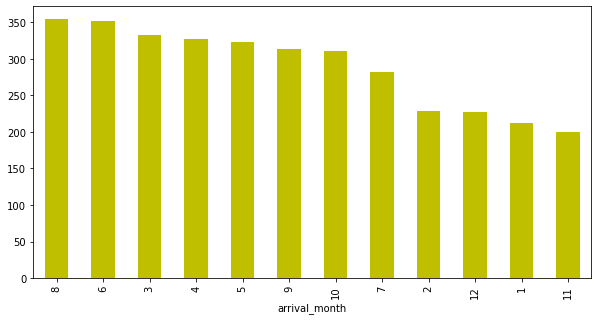

In [26]:
# visualize the booking status count on each month
busiest_month_df.plot(kind='bar', figsize=(10,5), color='y')
plt.show()

# 2. Which market segment do most of the guests come from?

In [27]:
#get the dataframe where repeated_guest is Yes
dfff = df[df['repeated_guest']==1]
market_segment_type = dfff.groupby('market_segment_type')['repeated_guest'].size().reset_index()
market_segment_type.set_index('market_segment_type', inplace=True)
market_segment_type = market_segment_type['repeated_guest'].sort_values(ascending=False)
market_segment_type.reset_index()

,market_segment_type,repeated_guest
0,Corporate,80
1,Complementary,26
2,Online,14
3,Offline,13
4,Aviation,2


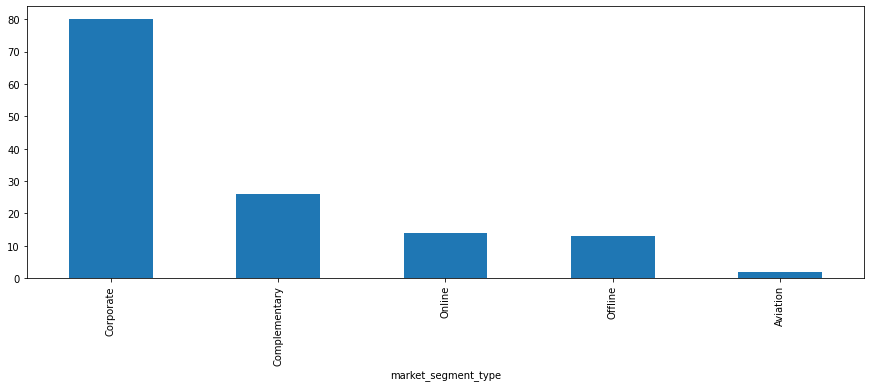

In [28]:
# visualize the booking status count on each month
market_segment_type.plot(kind='bar', figsize=(15,5))
plt.show()

Hotel rates are dynamic and change according to demand and customer demographics. 

# 3.What are the differences in room prices in different market segments?

In [29]:

market_segment_type_room = df.groupby('market_segment_type')['avg_price_per_room'].size().reset_index()
market_segment_type_room.set_index('market_segment_type', inplace=True)
market_segment_type_room = market_segment_type_room['avg_price_per_room'].sort_values(ascending=False)
market_segment_type_room.reset_index()

,market_segment_type,avg_price_per_room
0,Online,4265
1,Offline,905
2,Corporate,252
3,Complementary,64
4,Aviation,13


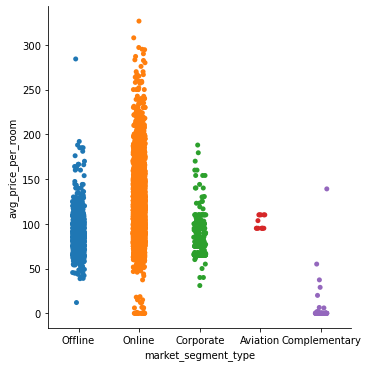

In [30]:
sns.catplot(x='market_segment_type',y='avg_price_per_room', data = df)
plt.show()

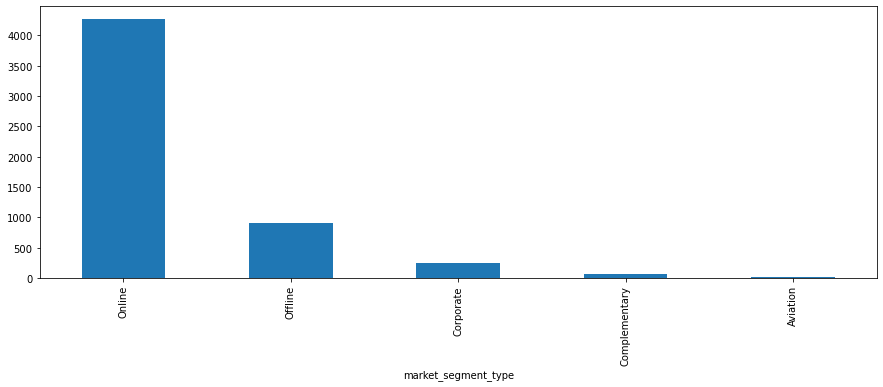

In [31]:
# lets try to visualize the booking status count on each month
market_segment_type_room.plot(kind='bar', figsize=(15,5))
plt.show()

# 4. What percentage of bookings are canceled?

In [32]:
cancelled_booking_perc = round(df['booking_status'].value_counts(normalize=True)[1],4)
print(f"{cancelled_booking_perc*100}% percentage of bookings are canceled.")

37.08% percentage of bookings are canceled.


# 5.What percentage of repeating guests cancel?

Repeating guests are the guests who stay in the hotel often and are important to brand equity.



In [33]:
dff_canc = df[(df['booking_status']=='Canceled')]

cancelled_booking_perc = round(dff_canc['repeated_guest'].value_counts(normalize=True)[1],4)
print(f"{cancelled_booking_perc*100}% percentage of repeated_guest are canceled.")

0.1% percentage of repeated_guest are canceled.


In [34]:
# checking the missing values in dataset
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Data Preprocessing

In [35]:
# remove the irrelevent columns that are not useful for the model prediction
df.drop(['arrival_year','arrival_month','arrival_date'], axis = 1, inplace=True)

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
labelEnc = LabelEncoder()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i] = labelEnc.fit_transform(df[i])


In [37]:
## Extract Dependent and Independent Variables
X = df[['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'type_of_meal_plan', 'room_type_reserved', 'lead_time',
       'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']]
Y = df[['booking_status']]

In [38]:
# independent variables
X.head()

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,market_segment_type,avg_price_per_room,no_of_special_requests
0,2,1,2,0,0,224,3,65.00,0
1,2,2,3,2,0,5,4,106.68,1
2,1,2,1,0,0,1,4,60.00,0
3,2,0,2,0,0,211,4,100.00,0
4,3,0,3,2,0,277,4,89.10,2


In [39]:
# dependent variable
Y.head()

,booking_status
0,1
1,1
2,0
3,0
4,0


In [40]:
#splitting the dataset 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [41]:
#to check the shape of training and testing
print("Training Shape :",X_train.shape)
print("Testing Shape :",X_test.shape)

Training Shape : (4399, 9)
Testing Shape : (1100, 9)


In [42]:
# standardization our data that better for in model prediction because values lies in a specific range (0,1)
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train) 
X_test= st_x.transform(X_test) 

# Model building 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [52]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# KNN  

In [53]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.81


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [54]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
print(scores)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.77090909 0.75818182 0.77090909 0.76       0.72727273 0.73818182
 0.74909091 0.73818182 0.74363636 0.75045537]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [55]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7506819009769828


In [61]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))

print(scores)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.8036363636363636, 0.7672727272727272, 0.8118181818181818, 0.8, 0.8172727272727273, 0.8036363636363636, 0.8109090909090909, 0.8036363636363636, 0.8127272727272727, 0.81, 0.8090909090909091, 0.8118181818181818, 0.8118181818181818, 0.8154545454545454, 0.8172727272727273, 0.8172727272727273, 0.8109090909090909, 0.8145454545454546, 0.8163636363636364, 0.8172727272727273, 0.8136363636363636, 0.8109090909090909, 0.8109090909090909, 0.8136363636363636, 0.8127272727272727]


Text(0, 0.5, 'Cross-Validated Accuracy')

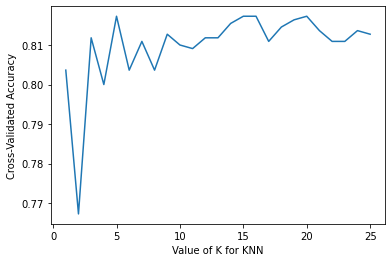

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [1]:
# function for evaluation metrics precision, recall, f1، accuracy
def modelEvaluation(predictions, y_test_set, model_name):
  

SyntaxError: unexpected EOF while parsing (<ipython-input-1-e64b520b3f3e>, line 3)